In [21]:
!pip install pandas numpy scikit-learn xgboost


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
!pip install matplotlib


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
pip install seaborn shap


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, 
    confusion_matrix, 
    classification_report, 
    roc_auc_score, 
    roc_curve, 
    precision_recall_curve, 
    auc
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style='whitegrid', color_codes=True)
pd.set_option('display.max_columns', None)


In [3]:
data = pd.read_csv("E:\Data of BSCS\FYP\Fraud_oracle.csv")


In [5]:
print(f"Dataset shape: {data.shape}")
data.head()

Dataset shape: (15420, 33)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [6]:
df = data

In [7]:
df_clean = df.drop(columns=['PolicyNumber', 'RepNumber', 'Month', 'MonthClaimed'])
print("Null values in each column:")
print(df_clean.isnull().sum())
print("\n--- Data Cleaned ---")
df_clean.head()

Null values in each column:
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

--- Data Cleaned ---


,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,5,Wednesday,Honda,Urban,Tuesday,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,3,Wednesday,Honda,Urban,Monday,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,5,Friday,Honda,Urban,Thursday,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,2,Saturday,Toyota,Rural,Friday,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,5,Monday,Honda,Urban,Tuesday,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [8]:
day_map = {
    'none': 0,
    '1 to 7': 4,
    '8 to 15': 11.5,
    '15 to 30': 22.5,
    'more than 30': 35  
}
df_clean['Accident_Days'] = df_clean['Days_Policy_Accident'].map(day_map)
df_clean['Claim_Days'] = df_clean['Days_Policy_Claim'].map(day_map)
df_clean['Claim_Lag'] = df_clean['Claim_Days'] - df_clean['Accident_Days']
day_map_cyclical = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
day_claimed_map_cyclical = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6, '0': 7}
df_clean['DayOfWeek_Num'] = df_clean['DayOfWeek'].map(day_map_cyclical)
df_clean['DayOfWeekClaimed_Num'] = df_clean['DayOfWeekClaimed'].map(day_claimed_map_cyclical)
df_clean['DayOfWeek_sin'] = np.sin(2 * np.pi * df_clean['DayOfWeek_Num'] / 7)
df_clean['DayOfWeek_cos'] = np.cos(2 * np.pi * df_clean['DayOfWeek_Num'] / 7)
df_clean['DayOfWeekClaimed_sin'] = np.sin(2 * np.pi * df_clean['DayOfWeekClaimed_Num'] / 8)
df_clean['DayOfWeekClaimed_cos'] = np.cos(2 * np.pi * df_clean['DayOfWeekClaimed_Num'] / 8)
df_clean = df_clean.drop(columns=[
    'Days_Policy_Accident', 'Days_Policy_Claim', 'Accident_Days', 'Claim_Days',
    'DayOfWeek', 'DayOfWeekClaimed', 'DayOfWeek_Num', 'DayOfWeekClaimed_Num'
])
print("Data after advanced feature engineering:")
df_clean.head()

Data after advanced feature engineering:


,WeekOfMonth,Make,AccidentArea,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Deductible,DriverRating,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,Claim_Lag,DayOfWeek_sin,DayOfWeek_cos,DayOfWeekClaimed_sin,DayOfWeekClaimed_cos
0,5,Honda,Urban,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,300,1,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0.0,0.974928,-0.222521,7.071068e-01,0.707107
1,3,Honda,Urban,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,4,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0.0,0.974928,-0.222521,0.000000e+00,1.000000
2,5,Honda,Urban,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,400,3,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0.0,-0.433884,-0.900969,7.071068e-01,-0.707107
3,2,Toyota,Rural,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,400,2,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0.0,-0.974928,-0.222521,1.224647e-16,-1.000000
4,5,Honda,Urban,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,400,1,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0.0,0.000000,1.000000,7.071068e-01,0.707107


C:\Users\dell\AppData\Local\Temp\ipykernel_10980\1127020739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_policy, x='BasePolicy', y='FraudFound_P', palette='viridis')
C:\Users\dell\AppData\Local\Temp\ipykernel_10980\1127020739.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_fault, x='Fault', y='FraudFound_P', palette='coolwarm')
C:\Users\dell\AppData\Local\Temp\ipykernel_10980\1127020739.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fraud_rate_vehicle, x='VehicleCategory', y='FraudFound

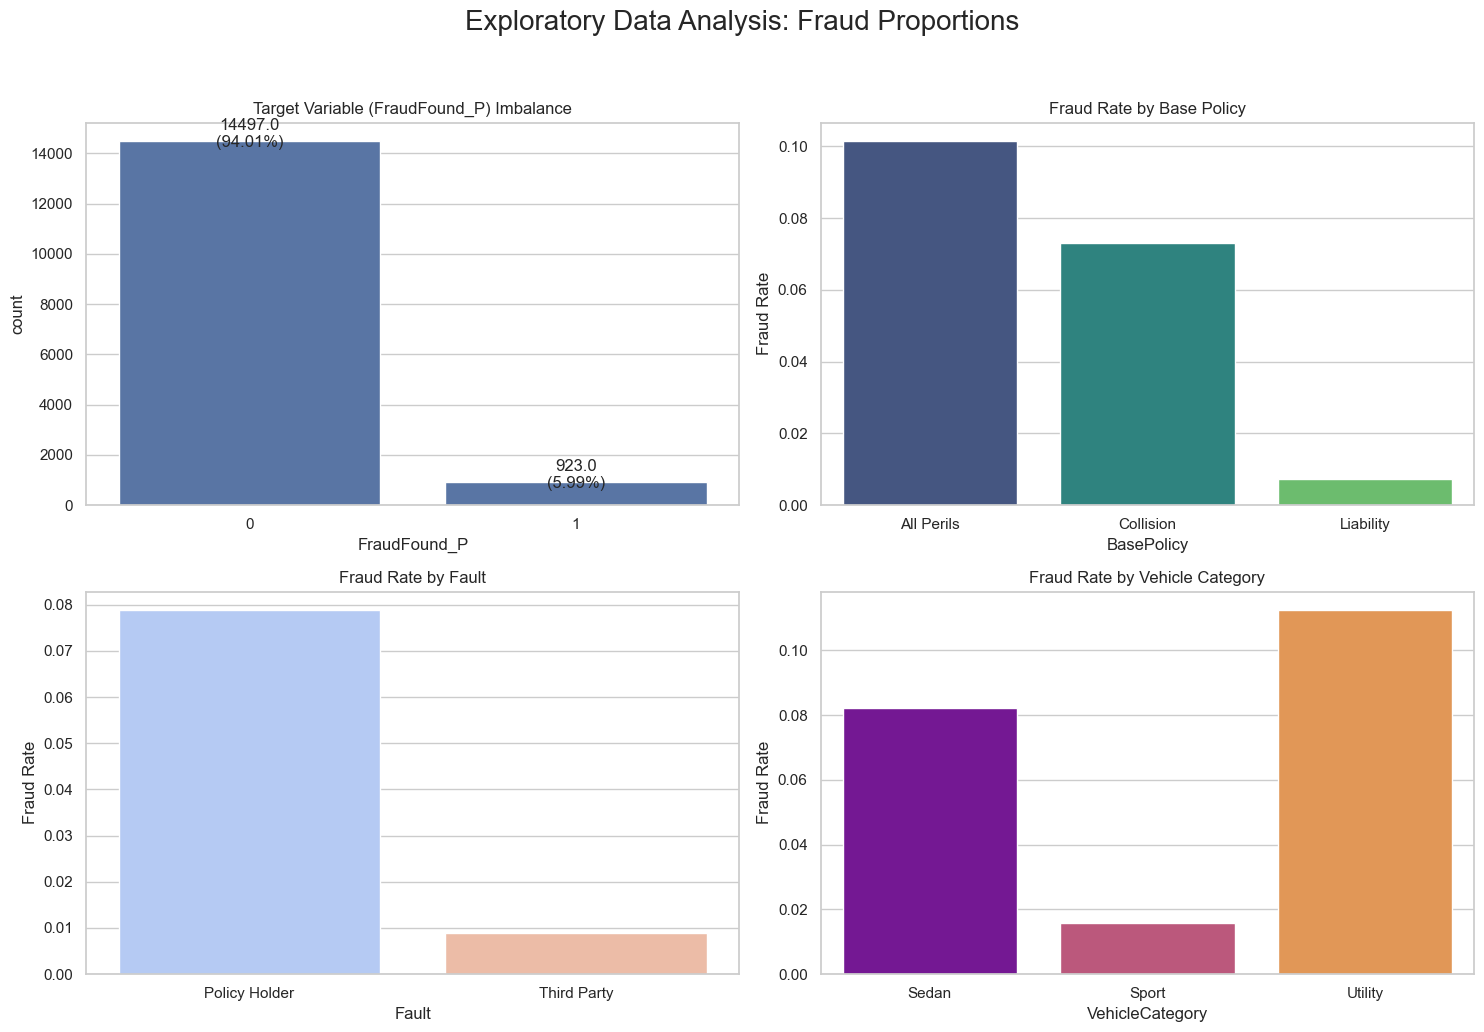

In [9]:
plt.figure(figsize=(15, 10))
plt.suptitle('Exploratory Data Analysis: Fraud Proportions', fontsize=20, y=1.03)
plt.subplot(2, 2, 1)
ax = sns.countplot(data=df_clean, x='FraudFound_P')
plt.title('Target Variable (FraudFound_P) Imbalance')
total = len(df_clean)
for p in ax.patches:
    percentage = f'{(p.get_height() / total) * 100:.2f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{p.get_height()}\n({percentage})', (x, y), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.subplot(2, 2, 2)
fraud_rate_policy = df_clean.groupby('BasePolicy')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_policy, x='BasePolicy', y='FraudFound_P', palette='viridis')
plt.title('Fraud Rate by Base Policy')
plt.ylabel('Fraud Rate')
plt.subplot(2, 2, 3)
fraud_rate_fault = df_clean.groupby('Fault')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_fault, x='Fault', y='FraudFound_P', palette='coolwarm')
plt.title('Fraud Rate by Fault')
plt.ylabel('Fraud Rate')
plt.subplot(2, 2, 4)
fraud_rate_vehicle = df_clean.groupby('VehicleCategory')['FraudFound_P'].mean().reset_index()
sns.barplot(data=fraud_rate_vehicle, x='VehicleCategory', y='FraudFound_P', palette='plasma')
plt.title('Fraud Rate by Vehicle Category')
plt.ylabel('Fraud Rate')
plt.tight_layout()
plt.show()

In [24]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [10]:
X = df_clean.drop('FraudFound_P', axis=1)
y = df_clean['FraudFound_P']
numerical_cols = [
    'Age', 'WeekOfMonth', 'WeekOfMonthClaimed', 'Deductible', 'DriverRating', 'Year',
    'Claim_Lag', 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfWeekClaimed_sin', 'DayOfWeekClaimed_cos'
]
ordinal_cols = [
    'VehiclePrice', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 
    'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars'
]
nominal_cols = [
    'Make', 'AccidentArea', 'Sex', 'MaritalStatus', 'Fault', 
    'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 
    'WitnessPresent', 'AgentType', 'BasePolicy'
]
price_cats = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
claims_cats = ['none', '1', '2 to 4', 'more than 4']
age_veh_cats = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
age_pol_cats = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
supp_cats = ['none', '1 to 2', '3 to 5', 'more than 5']
addr_cats = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years'] 
cars_cats = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[
        price_cats, claims_cats, age_veh_cats, age_pol_cats, 
        supp_cats, addr_cats, cars_cats
    ]))
])
nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('ord', ordinal_transformer, ordinal_cols),
        ('nom', nominal_transformer, nominal_cols)
    ],
    remainder='passthrough'
)
print("Preprocessor created successfully.")

Preprocessor created successfully.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)
print(f"Original X_train shape: {X_train.shape}")
print(f"Processed X_train shape: {X_train_processed.shape}")
print(f"\nOriginal y_train distribution:\n{y_train.value_counts(normalize=True)}")
print(f"\nOriginal y_test distribution:\n{y_test.value_counts(normalize=True)}")

Original X_train shape: (12336, 29)
Processed X_train shape: (12336, 68)

Original y_train distribution:
FraudFound_P
0    0.940175
1    0.059825
Name: proportion, dtype: float64

Original y_test distribution:
FraudFound_P
0    0.940013
1    0.059987
Name: proportion, dtype: float64


In [12]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
print(f"Calculated scale_pos_weight for XGBoost: {scale_pos_weight:.2f}")
models = {
    "Logistic Regression (Weighted)": LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    "Random Forest (Weighted)": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "XGBoost (Weighted)": XGBClassifier(
                                random_state=42, 
                                use_label_encoder=False, 
                                eval_metric='logloss',
                                scale_pos_weight=scale_pos_weight 
                            )
}
for name, model in models.items():
    print(f"\n--- Training {name} ---")
    model.fit(X_train_processed, y_train)
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    print(classification_report(y_test, y_pred, target_names=['Not Fraud (0)', 'Fraud (1)']))
    print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_proba):.4f}")
    print("-"*(30 + len(name)))

Calculated scale_pos_weight for XGBoost: 15.72

--- Training Logistic Regression (Weighted) ---
               precision    recall  f1-score   support

Not Fraud (0)       0.99      0.60      0.75      2899
    Fraud (1)       0.13      0.92      0.23       185

     accuracy                           0.62      3084
    macro avg       0.56      0.76      0.49      3084
 weighted avg       0.94      0.62      0.72      3084

ROC AUC Score: 0.8075
------------------------------------------------------------

--- Training Random Forest (Weighted) ---
               precision    recall  f1-score   support

Not Fraud (0)       0.94      1.00      0.97      2899
    Fraud (1)       1.00      0.02      0.03       185

     accuracy                           0.94      3084
    macro avg       0.97      0.51      0.50      3084
 weighted avg       0.94      0.94      0.91      3084

ROC AUC Score: 0.8100
------------------------------------------------------

--- Training XGBoost (Weighted) --

e:\Data of BSCS\FYP\fraud_detection_code\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:21:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


               precision    recall  f1-score   support

Not Fraud (0)       0.95      0.90      0.92      2899
    Fraud (1)       0.17      0.32      0.22       185

     accuracy                           0.86      3084
    macro avg       0.56      0.61      0.57      3084
 weighted avg       0.91      0.86      0.88      3084

ROC AUC Score: 0.7859
------------------------------------------------


In [13]:
from sklearn.model_selection import RandomizedSearchCV
xgb_base = XGBClassifier(
    random_state=42, 
    use_label_encoder=False, 
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight 
)
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9, 1.0],      
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], 
    'gamma': [0, 0.1, 0.5]                 
}
random_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=50,       
    cv=3,            
    scoring='roc_auc', 
    random_state=42,
    n_jobs=-1,       
    verbose=1
)
print("--- Starting Hyperparameter Tuning for XGBoost ---")
random_search.fit(X_train_processed, y_train)
print(f"\nBest Parameters Found: {random_search.best_params_}")
print(f"Best CV ROC AUC Score: {random_search.best_score_:.4f}")
best_model = random_search.best_estimator_

--- Starting Hyperparameter Tuning for XGBoost ---
Fitting 3 folds for each of 50 candidates, totalling 150 fits


e:\Data of BSCS\FYP\fraud_detection_code\myenv\Lib\site-packages\xgboost\training.py:199: UserWarning: [17:23:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best Parameters Found: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.05, 'gamma': 0.5, 'colsample_bytree': 0.7}
Best CV ROC AUC Score: 0.8262


In [14]:
best_model

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.7
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [17]:
features = best_model.feature_importances_

In [19]:
feature_names = X_train.columns

In [20]:
feature_names

Index(['WeekOfMonth', 'Make', 'AccidentArea', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'Deductible', 'DriverRating', 'PastNumberOfClaims',
       'AgeOfVehicle', 'AgeOfPolicyHolder', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'NumberOfSuppliments',
       'AddressChange_Claim', 'NumberOfCars', 'Year', 'BasePolicy',
       'Claim_Lag', 'DayOfWeek_sin', 'DayOfWeek_cos', 'DayOfWeekClaimed_sin',
       'DayOfWeekClaimed_cos'],
      dtype='object')

In [18]:
features

array([0.0075865 , 0.00501499, 0.00533248, 0.04875665, 0.0066641 ,
       0.00858581, 0.00462296, 0.00716359, 0.0089091 , 0.00587341,
       0.00933906, 0.00688056, 0.00867309, 0.00734588, 0.00721163,
       0.00770382, 0.0400194 , 0.00627294, 0.00799207, 0.        ,
       0.00717485, 0.00525524, 0.        , 0.00753834, 0.00968874,
       0.        , 0.        , 0.0063753 , 0.        , 0.00662453,
       0.00347406, 0.0083592 , 0.        , 0.00364583, 0.        ,
       0.01102578, 0.01038369, 0.00552544, 0.00613479, 0.00537976,
       0.00480375, 0.00326774, 0.00753403, 0.00761547, 0.        ,
       0.10044351, 0.08579532, 0.01134732, 0.02453101, 0.10984442,
       0.00307801, 0.02077006, 0.        , 0.00462192, 0.00701115,
       0.        , 0.00623569, 0.08791637, 0.00452871, 0.00595325,
       0.00573073, 0.00574772, 0.        , 0.00603111, 0.00897754,
       0.01375326, 0.03082227, 0.12710603], dtype=float32)

In [29]:
import pickle
import joblib

In [33]:
joblib.dump(best_model, "detection_model.pkl")

['detection_model.pkl']

In [31]:
joblib.dump(preprocessor, "preprocessor.pkl")

print("Model and preprocessor saved.")

Model and preprocessor saved.
